In [33]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
# Model
# pip install -U ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in C:\Users\tinke/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-6 Python-3.11.3 torch-2.1.0.dev20230604+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


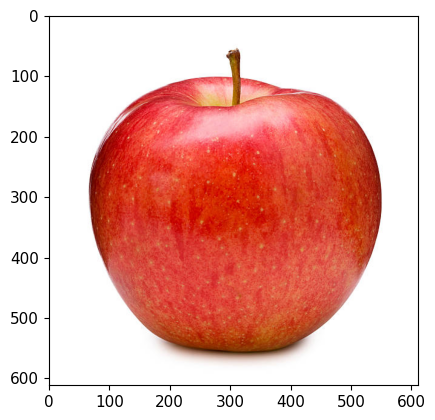

In [35]:
# Image
im = 'myapple_1.jpg'
# Load and plot the image
image = plt.imread(im)
plt.imshow(image)

In [36]:
# Inference
results = model(im)

results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,67.464676,84.615707,549.757324,559.911804,0.727682,47,apple


In [37]:
# Results
#crops = results.crop(save=True) 
crops = results.crop(save=True, save_dir='apple_cropped/')  # specify save dir

Saved 1 image to apple_cropped4
Saved results to apple_cropped4



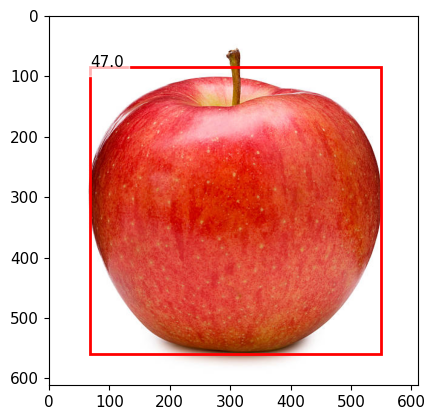

In [39]:
# Retrieve bounding box coordinates and labels
boxes = results.xyxy[0].cpu().numpy()[:, :4]  # Move tensor to CPU and convert to numpy
labels = results.xyxy[0].cpu().numpy()[:, -1]  # Move tensor to CPU and convert to numpy

# Load and plot the image
image = plt.imread(im)
plt.imshow(image)

# Plot the bounding boxes
for box, label in zip(boxes, labels):
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin
    rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin, label, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

# Show the image with bounding boxes
plt.show()